In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

##### x/W5/L4/mlp-dip-iitm

# Image Classification: Supervised Learning

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import io
import warnings

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
# Common imports 
import numpy as np
import os
import io
import warnings

# sklearn specific imports
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import Perceptron

from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV

from pprint import pprint
from sklearn.decomposition import PCA

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# global matplotlib settings
mpl.rc('figure', figsize=(8,6))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's 

# Handwritten Digit Classification

## Data Loading and Splitting

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# it returns Data and label as a pandas dataframe

The data matrix X and the respective label vector y need to be converted to the numpy array by calling a `to_numpy` method.

In [5]:
X = X.to_numpy()
y = y.to_numpy()

- Let's get some information like number of features, number of classes about the dataset.
- Observe that the labels are of string data type not integers.

In [6]:
target_names = np.unique(y)
print('Number of samples: {0}, type:{1}'.format(X.shape[0], type(X)))
print('Number of features: {0}'.format(X.shape[1]))
print('Minimum: {0}, Maximum:{1}'.format(np.min(X), np.max(X)))
print('Number of classes: {0}, type:{1}'.format(len(target_names), y.dtype))
print('Labels: {0}'.format(target_names))

Number of samples: 70000, type:<class 'numpy.ndarray'>
Number of features: 784
Minimum: 0.0, Maximum:255.0
Number of classes: 10, type:object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


- The MNIST dataset is clean and the range of values that each feature can take is also known. Therefore, the samples in the dataset may not require many data preprocessing techniques.
- However, it is often to scale the range of features between 0 to 1.
- So, we can either use `MinMaxScaler` or `MaxAbsScaler`. They don't make any differences as the image pixels can takes only positive values from 0 to 255.

In [7]:
X = MinMaxScaler().fit_transform(X)
print("Minimum:{0}, Maximum:{1}".format(np.min(X), np.max(X)))

Minimum:0.0, Maximum:1.0


## Data Visualization

the images are stacked as a row vector of size 1 X 784 and therefore must be reshaped to the matrix of size 28 X 28 to display them properly.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


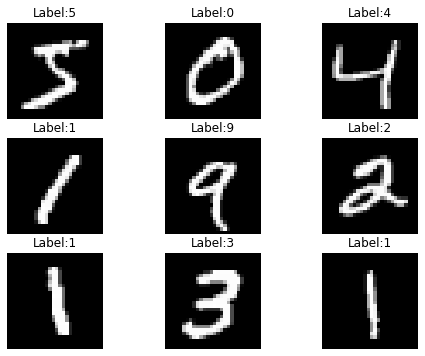

In [8]:
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i, j].set_axis_off()

These matrices are also close to sparse (that is, there are lots of 0(black pixels) in the matrix than non-zero pixels).

## Data Splitting

- Since the samples in the dataset are already shuffled, we need not to shuffle ti again. Therefore using `train_test_split`() may be skipped.

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Before proceeding further, we need to check whether the dataset is balanced or imbalanced. We can do it bpy plotting the distribution of samples in each classes.

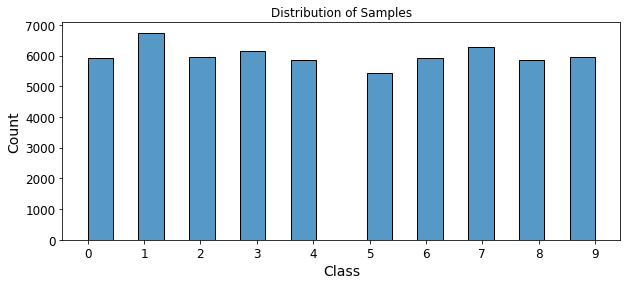

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2, 3, 4, 5, 6, 7, 8, 9], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

## Binary Classification: 0-Detector

### Modifying Labels

- Let us start with a simple classification problem, that is, binary classification.
- Since the original label vector contains 10 classes, we need to modify the number of classes to 2.
- Therefore, the label 0 will be changed to 1 and all other labels(1-9) will be changed to -1.
- We name the label vectors as `y_train_0` and `y_test_0`.

In [11]:
# Initialize new variable names with all -1
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

# find indices of digit 0 image
indx_0 = np.where(y_train == '0') # remember original labels are of type str not int
# use those indices to modify y_train_0 & y_test_0
y_train_0[indx_0] =1
indx_0 = np.where(y_test=='0')
y_test_0[indx_0] = 1

### Sanity Check
- Let's display the elements of y_train and y_train_0 to verify whether the labels are properly modified. Of course, we can't verify all the 60000 labels by inspection.

In [12]:
print(y_train[:10]) # 10 class labels

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


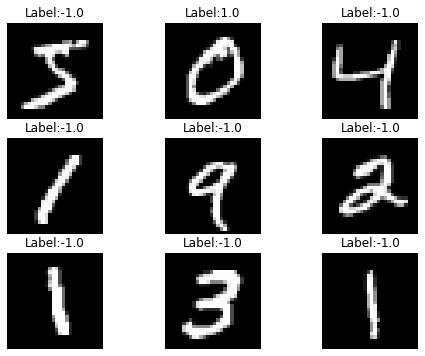

In [13]:
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y_train_0[index+j])))
        ax[i, j].set_axis_off()

## Baseline Models

Enough about data!

Let us quickly. construct a baseline model with the following rule (you are free to choose different rule)
 1. Cont number of samples per class
 2. The model **always outputs** the class which has highest number of samples.
 3. Then calculate the accuracy of the baseline model.

In [14]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==-1)[0])
print(num_pos, num_neg)

5923 54077


In [15]:
base_clf = DummyClassifier(strategy='most_frequent') # there are other strategies


In [16]:
base_clf.fit(X_train, y_train_0)
print('Training accuracy: {0:.2f}'.format(base_clf.score(X_train, y_train_0)))
print('Testing accuracy: {0:.2f}'.format(base_clf.score(X_test, y_test_0)))

Training accuracy: 0.90
Testing accuracy: 0.90


- Now the reason is obvious. The model would have predicted 54077 sample correctly just by outputing -1 for all the input samples. Therefore the accuracy will be 54000/60000 = 90.12%
- This is the reason why "accuracy" alone is not always a good measure!

## Perceptron model

1. Training data: (feature, label) or (X, y), where label y is a discrete number from a finite set. Features in this case are pixel value of an image.

> Linearly separable examples lead to convergence of the alforithm ith zero training loss, else it oscillates.

### Parameters of Perceptron class

`class sklearn.linear_model.Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False`

- Need not to pay attention to all the arguments and their default values.
- Internally, the API uses the perceptron loss(i.e. it calls Hinge(0,0), where 0.0 is a threshold) and uses SGD to update the weights.
- The other way of deploying perceptron is to use the general `linear_model.SGDClassifier` with `loss='perceptron'`
- The above loss is termed as hard Hinge-loss(as scores pass through the sign function) and hence we can't use SGD.
- Whereas, Sklear implements hinge-loss with the following definition: max(0, -w$x^i$$y^i$) and by default calls sgd to minimize the loss.

### Instantiation
 - Create an instance of binary classifier(bin_clf) and call the `fit` method to train the model.

In [17]:
bin_clf = Perceptron(max_iter=1000, random_state=1729)

### Training and Prediction

- Call the `fit` method to train the model.
- It would be nice to plot the iteration vs loss curve for the training. However, Sklearn does not have a direct function to plot it.
- Neverthless, we can workaround this using `partial_fit` method (Which will be demonstrated at the end of the lecture.)

In [18]:
bin_clf.fit(X_train, y_train_0)
print('Dimension of weights w: {0}'.format(bin_clf.coef_.shape))
print('Bias :{0}'.format(bin_clf.intercept_))
print('The loss function: {0}'.format(bin_clf.loss_function_))

Dimension of weights w: (1, 784)
Bias :[-108.]
The loss function: <sklearn.linear_model._sgd_fast.Hinge object at 0x7f2a069dcc30>


Let's make predictions on the train set and then calculate the training accuracy.

In [19]:
y_hat_train_0 = bin_clf.predict(X_train)
print('Training Accuracy: ', bin_clf.score(X_train, y_train_0))

Training Accuracy:  0.99095


let's make the predictions on the test set and then calculate the testing accuracy.

In [20]:
print('Test accuracy: ', bin_clf.score(X_test, y_test_0))

Test accuracy:  0.989


### Displaying predictions

- Take few images from the testset at random and display it with the corresponding predictions.
- plot a few images in a single figure window along with their respective predictions.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


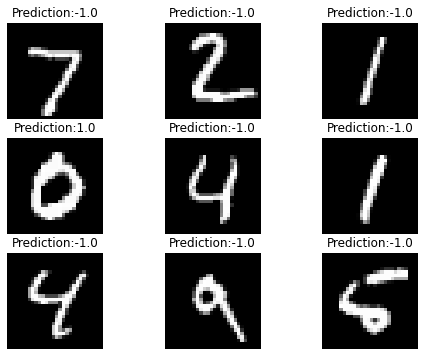

In [21]:
y_hat_test_0 = bin_clf.predict(X_test)
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # display "num_inages" starting from idx_offset
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i, j].imshow(X_test[index+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Prediction:{0}'.format(str(y_hat_test_0[index+j])))
        ax[i, j].set_axis_off()

- Display images of positive classes from testset along with their predictions.

In [22]:
indx_0 = np.where(y_test_0 == 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


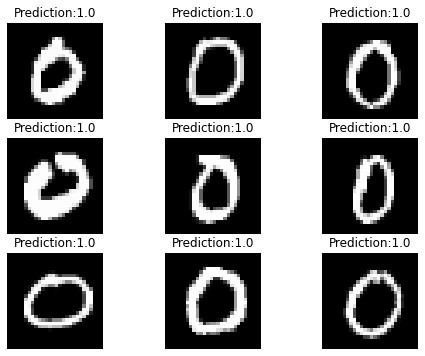

In [23]:
zeroImgs = X_test[indx_0[0]]
zeroLabels = y_hat_test_0[indx_0[0]]
num_images = 9 # choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # display "num_images" starting from idx_offset
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i, j].imshow(zeroImgs[index+j].reshape(28,28),cmap='gray') 
        ax[i, j].set_title('Prediction:{0}'.format(str(zeroLabels[index+j])))
        ax[i, j].set_axis_off()

It seems that there are a significant number of images that are correctly classified. Let's see how many?


In [24]:
num_misclassified = np.count_nonzero(zeroLabels == -1)
num_correctpred = len(zeroLabels) - num_misclassified
accuracy = num_correctpred/len(zeroLabels)
print(accuracy)

0.9193877551020408


- This above score (guess the name of the metric) is less than the accuracy score of the model but it seems pretty descent!.



### Better Evaluation metrics
- We now know that using the accuracy alone to measure the performance of the model is not suitable (especially for imbalanced datasets), so which are the more suitabel metrics then?

#### Confusion Matrix

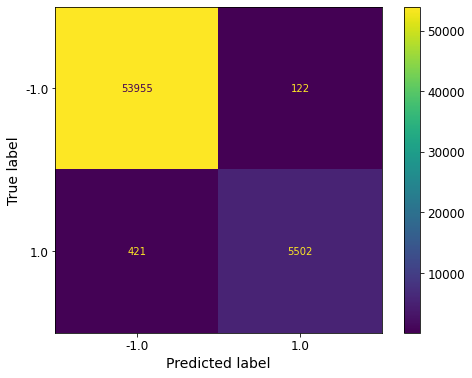

In [25]:
y_hat_train_0 = bin_clf.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0, values_format='.5g')
plt.show()

- Pay attention to the number of FPs and FNs. Suppose for some reasons, we want the classifier to avoid FPs to a good extent irrespective of FNs, how can we achieve it?.
- To answer it, let's compute the other metrics which take FPs and FNs into account.


#### Precision and Recall
- We can use the function `classification_report` to compute these parameters. However, for the time being let's compute these parameters using the data from the confusion matrix manually.

In [26]:
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0, 0]
fn = cf_matrix[1, 0]
fp = cf_matrix[0, 1]
tp = cf_matrix[1,1]

In [27]:
precision = tp/(tp + fp)
print('Precision: ', precision)
recall = tp/(tp + fn)
print('Recall: ', recall)
accuracy = (tp + tn)/(tp + fp+ fn + tn)
print('Accuracy: ', accuracy)

Precision:  0.9783072546230441
Recall:  0.9289211548201924
Accuracy:  0.99095


- The precision is close to 0.98. Despite it , we still want to increase the precision. Let's come back to this later.
- In general, we would like to know whether the model under consideration with the set hyper-parameters is a good one for a given problem.

### Cross Validation
- Well, to address this, we have to use cross-validation folds and measure the same metrics across these folds for different values of hyper-parameters.
- However, perceptron does not have many hyperparameters other than the learning rate.
- For the moment, we set the learning rate to its default value. Later, we use `GridSearchCV` to find the better value for the learning rate.

In [28]:
bin_clf = Perceptron(max_iter=100, random_state=1729) # repeating for readability
scores = cross_validate(bin_clf, X_train, y_train_0, cv=5,
                       scoring=['precision', 'recall', 'f1'],
                       return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([0.98513937, 2.00713849, 1.43842673, 1.30856156, 1.672328  ]),
 'score_time': array([0.04473472, 0.04310369, 0.04265881, 0.04843354, 0.04701853]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


- **Note:**
    The perceptron estimator passed as an argument to the function `cross_validate` is internally cloned `num_fold` `(cv=5)` times and fitted independently on each fold.(you can check this by setting `warm_start=True`)

- Compute the average and standard deviation of scores for all three metrics on (k=5) folds to measure the generalization!.

In [29]:
print('f1,         avg:{0:.2f}, std:{1:.3f}'.format(scores['test_f1'].mean(), scores['test_f1'].std()))
print('precision,  avg:{0:.2f}, std:{1:.3f}'.format(scores['test_precision'].mean(), scores['test_precision'].std()))
print('recall,     avg:{0:.2f}, std:{1:.3f}'.format(scores['test_recall'].mean(), scores['test_recall'].std()))

f1,         avg:0.94, std:0.013
precision,  avg:0.96, std:0.013
recall,     avg:0.92, std:0.035


- Let us pick the first estimator returned by the cross-validate function.
- So we can hope that the model might also perform well on test data. Let's check out.

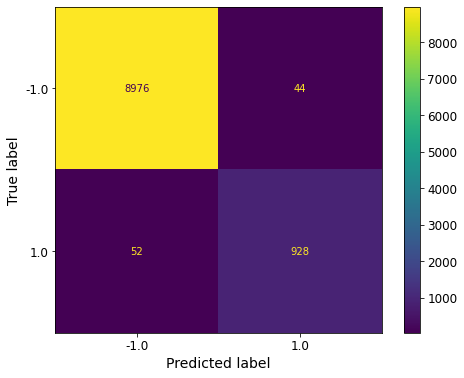

In [30]:
bin_clf = scores['estimator'][0]
y_hat_test_0 = bin_clf.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0, values_format='.5g')

In [31]:
print('Precision %.2f'%precision_score(y_test_0, y_hat_test_0))
print('Recall %.2f'%recall_score(y_test_0, y_hat_test_0))

Precision 0.95
Recall 0.95


this is good!.

#### Way-2 for Generalization:
(optional)
- There is an another approach of getting predicted labels via cross-validation and using it to measure the generalization.
- In this case, each sample in the dataset will be part of only one test set in splited folds.

In [32]:
y_hat_train_0 = cross_val_predict(bin_clf, X_train, y_train_0, cv=5)


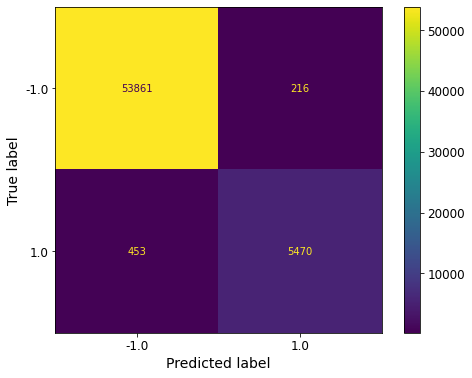

In [33]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0, values_format='.5g')
plt.show()

In [34]:
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0, 0]
fn = cf_matrix[1, 0]
fp = cf_matrix[0, 1]
tp = cf_matrix[1,1]

In [35]:
  precision = tp/(tp + fp)
print('Precision: %.2f'%precision)
recall = tp/(tp + fn)
print('Recall: %.2f'%recall)
accuracy = (tp + tn)/(tp + fp+ fn + tn)
print('Accuracy: %.2f'%accuracy)

Precision: 0.96
Recall: 0.92
Accuracy: 0.99


- Compare the precision and recall score obtained by the above method with that of the previous method(i.e. using `cross_validate`)

- Finally, we can print all these scores as a report using the `classification_report` function

In [36]:
print('Precision %.2f'%precision_score(y_train_0, y_hat_train_0))
print('Recall %.2f'%recall_score(y_train_0, y_hat_train_0))
print('-'*50)
print(classification_report(y_train_0, y_hat_train_0))


Precision 0.96
Recall 0.92
--------------------------------------------------
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.96      0.92      0.94      5923

    accuracy                           0.99     60000
   macro avg       0.98      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



#### Precision/Recall Tradeoff
- Often time we need to make a trade off between precision and recall scores of a model.
- It depends on the problem at hand.
- It is important to note that we should not pass the predicted labels as input to `precision_recall_curve` function, instead we need to pass the probability scores or the output from the decision function!.
- The `Perceptron()` class contains a `decision_function` method, therefore, we can make use of it.
- Then, internally the decision scores are sorted, tps and fps will be computed by changing the threshold from index[0] to index[-1].
- Let us compute the scores from the decision function.

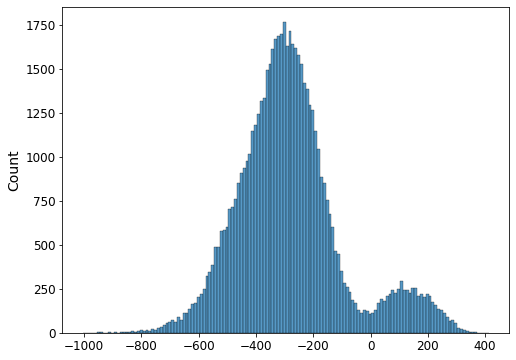

In [37]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(X_train, y_train_0)
y_scores = bin_clf.decision_function(X_train)
sns.histplot(np.sort(y_scores))
plt.show()

There are so many negative values than the positives? bcoz of Class-Imbalance

- Suppose threshold takes teh value of -600, then all the samples having score greater than -600 is set to 1(Positive label) and less than it is set to -1 (neg label).
- Therefore, the number of False Positives will be increased. This will in turn reduce the precision score to a greater extent.
- On the otherhand, if the threshold takes teh value of, say, 400. Then, the number of false negatives will be increase and hence the recall will reduce to a greater extent.
- Let's see it in action.

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores, pos_label=1)

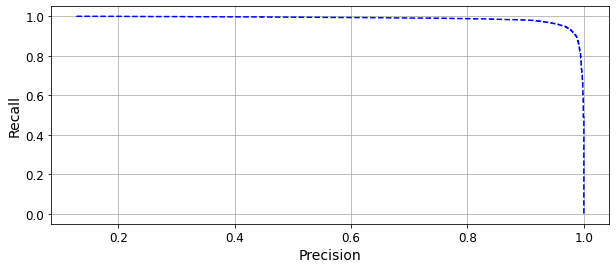

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(precisions[:-1], recalls[:-1], "b--")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

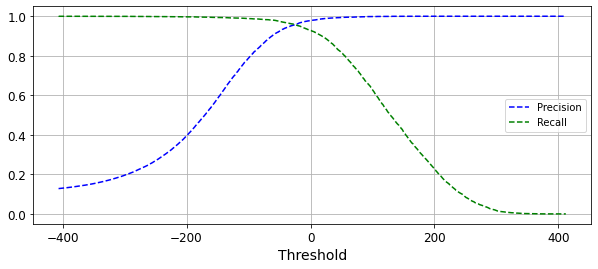

In [40]:
plt.figure(figsize=(10, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel('Threshold')
# plt.ylabel('Recall')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [41]:
# get the index of threshold around zero
idx_th = np.where(np.logical_and(thresholds>0, thresholds<1))
print('precision for zero threshold: ', precisions[idx_th[0][0]])

precision for zero threshold:  0.9783072546230441


- **Here  is the solution** to the question how can we increase the precision of the classifier by compromising the recall. We can make use of the above plot.
- Let's see how.

#### The ROC Curve

In [42]:
from sklearn.metrics import roc_curve

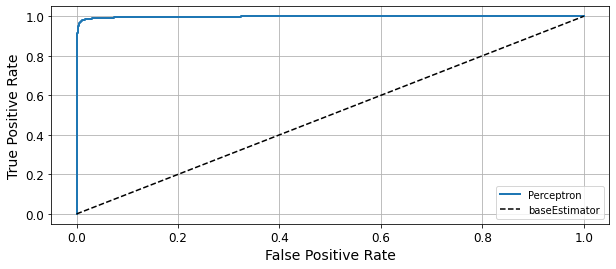

In [43]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, linewidth=2, label="Perceptron")
plt.plot([0, 1], [0, 1], 'k--', label='baseEstimator')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Warm Start vs Cold Start

#### Cold Start
- If we execute the `fit` method of `bin_clf` repeatedly, we get the same score for both trainig and testing accuracy.
- This because every time the fit method is called, the model weights are initialized to the same values. Therefore, we obtain the same score.
- This is termed as **cold start**. Let's execute the following cell 4 times and observe the score.

In [44]:
bin_clf.fit(X_train, y_train_0)
y_hat_train_0 = bin_clf.predict(X_train)
print('Training Accuracy: ', bin_clf.score(X_train, y_train_0))
print('Test Accuracy: ', bin_clf.score(X_test,y_test_0))

Training Accuracy:  0.99095
Test Accuracy:  0.989


#### Warm Start
- Setting `warm_start=True` retains the weight values of the model after `max_iter` and hence produce different results for each execution.
- Warm starting is useful in many ways. It helps us train the model by initializing the weight values from the previous state. So we can pause the training and resume it whenever we get the resource for computation.

- Of course, it is not required for simple models like perceptron and for a small dataset like MNIST.
- in this notebook, we use this feature to plot the iteration vs loss curve.
- Let us execute the following lines of code 4 times and observe how the training accuracy changes for each execution.

In [45]:
bin_clf_warm = Perceptron(max_iter=1000,random_state=1729,warm_start=True)

In [46]:
bin_clf_warm.fit(X_train, y_train_0)
print('Training Accuracy:', bin_clf_warm.score(X_train, y_train_0))

Training Accuracy: 0.99095
